# Porto Seguro’s Safe Driver Prediction
### Team22 - Zihan Wan ＆ Rongjing Huang

------------------------------------------------------
### Project Process: 
- 1. Read Data
- 2. Build metadata
- 3. Outlier detection
- 4. Missing Value handling
    - 4.1 Multivariate imputation
    - 4.2 Univariate imputation
- 5. EDA
    - 5.1 Discrete feature analysis
        - 5.1.1 Nominal
        - 5.1.2 Binary
        - 5.1.3 Ordinal
    - 5.2 Continuous feature analysis
        - 5.2.1 Correlation Analysis
        - 5.2.2 Regression Analysis
- 6. Feature Engineering
    - 6.1 Encoding
        - 6.1.1 OneHotEncoder
        - 6.1.2 TargetEncoder
    - 6.2 Feature Transformation
        - 6.2.1 WOE and IV 
    - 6.3 Feature Enhancement
        - 6.3.1 Feature Interaction 
    - 6.4 Feature Selection
        - 6.4.1 Based on statistical metrics
        - 6.4.2 Based on model metrics
- 7. Data Modeling
    - 7.1 Model Evaluation Metrics
    - 7.2 Build Models
        - 7.2.1 Decision Tree
        - 7.2.2 Logistic Regression
        - 7.2.3 XGBoost

## 1. Read Data

In [1]:
# import packages

# data processing
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import re
# data visualization
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly import offline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Used to display negative signs normally
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['font.sans-serif']=['SimHei']
# change text color
import colorama
from colorama import Fore, Style
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Checking feature names, non-null values, and variable types
train.info(verbose=False)
test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Columns: 59 entries, id to ps_calc_20_bin
dtypes: float64(10), int64(49)
memory usage: 267.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Columns: 58 entries, id to ps_calc_20_bin
dtypes: float64(10), int64(48)
memory usage: 395.1 MB


In [4]:
# Top 10 rows
train.head(10)

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   
5  19       0          5              1          4              0   
6  20       0          2              1          3              1   
7  22       0          5              1          4              0   
8  26       0          5              1          3              1   
9  28       1          1              1          2              0   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0              0              0              1              0  ...   
1              0              0              0              1  ...   
2              0              0              0              1  ...   
3              0              1              0              0  ...   
4              0              1              0              0  ...   
5              0              0              0              0  ...   
6              0              0              1              0  ...   
7              0              1              0              0  ...   
8              0              0              0              1  ...   
9              0              0              1              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1           1           9               0   
2           4           2           7           7               0   
3           2           2           4           9               0   
4           3           1           1           3               0   
5           4           2           0           9               0   
6           3           0           0          10               0   
7           7           1           3           6               1   
8           4           2           1           5               0   
9           3           5           0           6               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               1               1               0               1   
2               1               1               0               1   
3               0               0               0               0   
4               0               0               1               1   
5               1               0               1               1   
6               1               0               0               1   
7               0               1               0               1   
8               1               0               0               0   
9               1               0               0               1   

   ps_calc_20_bin  
0               1  
1               0  
2               0  
3               0  
4               0  
5               1  
6               0  
7               0  
8               1  
9               0  

[10 rows x 59 columns]

In [5]:
# Last ten rows
test.head(10)

id  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0   0          0              1          8              1              0   
1   1          4              2          5              1              0   
2   2          5              1          3              0              0   
3   3          0              1          6              0              0   
4   4          5              1          7              0              0   
5   5          0              1          6              0              0   
6   6          0              1          3              0              0   
7   8          0              1          0              0              0   
8  10          0              1          7              0              0   
9  11          1              1          6              0              0   

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ...  \
0              0              1              0              0  ...   
1              0              0              0              1  ...   
2              0              0              0              1  ...   
3              1              0              0              0  ...   
4              0              0              0              1  ...   
5              1              0              0              0  ...   
6              0              1              0              0  ...   
7              1              0              0              0  ...   
8              0              1              0              0  ...   
9              0              0              0              1  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           1           1           1          12               0   
1           2           0           3          10               0   
2           4           0           2           4               0   
3           5           1           0           5               1   
4           4           0           0           4               0   
5           8           1           4           9               1   
6           2           0           4           6               1   
7           3           1           4           9               0   
8           5           1           4           6               0   
9           6           1           6          10               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               0               1               1               0   
2               0               0               0               0   
3               0               1               0               0   
4               1               1               0               0   
5               0               1               0               1   
6               1               0               0               0   
7               1               0               0               0   
8               0               1               0               0   
9               1               1               0               0   

   ps_calc_20_bin  
0               1  
1               1  
2               0  
3               0  
4               1  
5               0  
6               0  
7               0  
8               0  
9               0  

[10 rows x 58 columns]

----------------------------
## 2. Build metadata

- Metadata, also called mediated data, or data about data.
- For this data with high dimensionality and many features, we must structure the data in order to facilitate further analysis, then metadata is a good start.

In [6]:
# train test combined into one fullset
fullset=pd.concat([train,test])

In [7]:
# Write a function for build metadata
def meta(train_data,test_data):
    
    # Merge training and test sets
    fullset=pd.concat([train_data,test_data])

    # Create an empty list
    data = []
    
    # Iterate over each column
    for col in fullset.columns:
        
        #role ==> id|target|features
        if col == 'id':
            role = 'id'
        elif col == 'target':
            role = 'target'
        else:
            role = 'feature'
        
        #category ==> car|individual|region|calculated
        if 'ind' in col:
            category = 'individual'
        elif 'reg' in col:
            category = 'region'
        elif 'car' in col:
            category = 'car'
        elif 'calc' in col:
            category = 'calculated'
        else:
            category = 'other'
        
        #level(variable type) ==> binary|nominal|ordinal|interval|ratio
        if 'bin' in col or col == 'target':
            level = 'binary'
        elif 'cat' in col or col == 'id':
            level = 'nominal'
        elif fullset[col].dtype == 'float64':
            #Exclude -1 value, if all in [0,1] then ratio
            if (fullset[fullset[col]!=-1][col]<=1).all() and (fullset[fullset[col]!=-1][col]>=0).all():
                level = 'ratio'
            #If it's not ratio, it's interval
            else:
                level = 'interval'
        elif fullset[col].dtype == 'int64':
            level = 'ordinal'
            
        #dtype ==> int | float | object...
        dtype = fullset[col].dtype
        
        #unique_num/cardinality ==> Number of unique values
        # Disregard id, target, continuous features
        if col == 'id' or col == 'target' or fullset[col].dtype == 'float64':
            cardinality = 'Ignore'
        else:
            #Exclude -1 value
            cardinality = fullset[fullset[col]!=-1][col].nunique()
        
        #cardinality_level ==> high|low|median
        if col == 'id' or col == 'target' or fullset[col].dtype == 'float64':
            cardinality_level = 'Ignore'
        elif fullset[fullset[col]!=-1][col].nunique()<=10:
            cardinality_level = 'Low Cardinality'
        elif 10<=fullset[fullset[col]!=-1][col].nunique()<50:
            cardinality_level = 'Medium Cardinality'
        else:
            cardinality_level = 'High Cardinality'
        
        #missing_num ==> Number of missing values
        missing = fullset[fullset[col]==-1][col].count()
 
        #missing_percent ==> Percentage of missing values
        missing_percent = f'{missing}({round(missing*100/len(fullset),2)}%)'
    
        #imputation ==> Methods for filling in missing values
        if fullset[fullset[col]==-1][col].count()/fullset.shape[0] > 0.4:
            imputation = 'remove'
        elif fullset[fullset[col]==-1][col].count() == 0:
            imputation = 'No Missing'
        #continuous features - interval/ratio
        elif fullset[col].dtype == 'float64':
            imputation = ('mode','median','mean')
        # nominal/binary/（Disregard id and target for now）
        elif 'cat' in col.split('_') or 'bin' in col.split('_'):
            imputation = ('mode')
        # ordinal
        elif fullset[col].dtype == 'int64':
            imputation = ('mode','median')
        
        #keep ==> Whether to keep
        if col == 'id' or fullset[fullset[col]==-1][col].count()/fullset.shape[0] > 0.4:
            keep = False
        else:
            keep = True
        
        # Store each attribute of each column by dictionary
        cols = {'colname':col
                ,'role':role
                ,'category':category
                ,'level':level
                ,'dtype':dtype
                ,'cardinality':cardinality
                ,'cardinality_level':cardinality_level
                ,'missing':missing
                ,'missing_percent':missing_percent
                ,'imputation':imputation
                ,'keep':keep}
        
        # Store each attribute of each column in the empty list (including column names)
        data.append(cols)
    
    # Convert list to df
    metadata = pd.DataFrame(data, columns=['colname','role','category','level','dtype','cardinality','cardinality_level','missing','missing_percent','imputation','keep'])
    # Set the index of df to the variable name
    metadata.set_index('colname', inplace=True)
    return metadata

In [8]:
# Call function and view results
metadata = meta(train,test)
metadata 

role    category     level    dtype cardinality  \
colname                                                              
id                   id       other   nominal    int64      Ignore   
target           target       other    binary  float64      Ignore   
ps_ind_01       feature  individual   ordinal    int64           8   
ps_ind_02_cat   feature  individual   nominal    int64           4   
ps_ind_03       feature  individual   ordinal    int64          12   
ps_ind_04_cat   feature  individual   nominal    int64           2   
ps_ind_05_cat   feature  individual   nominal    int64           7   
ps_ind_06_bin   feature  individual    binary    int64           2   
ps_ind_07_bin   feature  individual    binary    int64           2   
ps_ind_08_bin   feature  individual    binary    int64           2   
ps_ind_09_bin   feature  individual    binary    int64           2   
ps_ind_10_bin   feature  individual    binary    int64           2   
ps_ind_11_bin   feature  individual    binary    int64           2   
ps_ind_12_bin   feature  individual    binary    int64           2   
ps_ind_13_bin   feature  individual    binary    int64           2   
ps_ind_14       feature  individual   ordinal    int64           5   
ps_ind_15       feature  individual   ordinal    int64          14   
ps_ind_16_bin   feature  individual    binary    int64           2   
ps_ind_17_bin   feature  individual    binary    int64           2   
ps_ind_18_bin   feature  individual    binary    int64           2   
ps_reg_01       feature      region     ratio  float64      Ignore   
ps_reg_02       feature      region  interval  float64      Ignore   
ps_reg_03       feature      region  interval  float64      Ignore   
ps_car_01_cat   feature         car   nominal    int64          12   
ps_car_02_cat   feature         car   nominal    int64           2   
ps_car_03_cat   feature         car   nominal    int64           2   
ps_car_04_cat   feature         car   nominal    int64          10   
ps_car_05_cat   feature         car   nominal    int64           2   
ps_car_06_cat   feature         car   nominal    int64          18   
ps_car_07_cat   feature         car   nominal    int64           2   
ps_car_08_cat   feature         car   nominal    int64           2   
ps_car_09_cat   feature         car   nominal    int64           5   
ps_car_10_cat   feature         car   nominal    int64           3   
ps_car_11_cat   feature         car   nominal    int64         104   
ps_car_11       feature         car   ordinal    int64           4   
ps_car_12       feature         car  interval  float64      Ignore   
ps_car_13       feature         car  interval  float64      Ignore   
ps_car_14       feature         car     ratio  float64      Ignore   
ps_car_15       feature         car  interval  float64      Ignore   
ps_calc_01      feature  calculated     ratio  float64      Ignore   
ps_calc_02      feature  calculated     ratio  float64      Ignore   
ps_calc_03      feature  calculated     ratio  float64      Ignore   
ps_calc_04      feature  calculated   ordinal    int64           6   
ps_calc_05      feature  calculated   ordinal    int64           7   
ps_calc_06      feature  calculated   ordinal    int64          11   
ps_calc_07      feature  calculated   ordinal    int64          10   
ps_calc_08      feature  calculated   ordinal    int64          12   
ps_calc_09      feature  calculated   ordinal    int64           8   
ps_calc_10      feature  calculated   ordinal    int64          26   
ps_calc_11      feature  calculated   ordinal    int64          21   
ps_calc_12      feature  calculated   ordinal    int64          12   
ps_calc_13      feature  calculated   ordinal    int64          16   
ps_calc_14      feature  calculated   ordinal    int64          25   
ps_calc_15_bin  feature  calculated    binary    int64           2   
ps_calc_16_bin  feature  calculated    binary    int64           2   
ps_calc_17_bin  feature  calc

In [9]:
# Based on metadata, find out how many features each data role and variable type has
count = metadata.groupby(['role', 'level'])['role'].size()
count_dic = {'count':count}
pd.DataFrame(count_dic).reset_index()

role     level  count
0  feature    binary     17
1  feature  interval      5
2  feature   nominal     14
3  feature   ordinal     16
4  feature     ratio      5
5       id   nominal      1
6   target    binary      1

In [10]:
# Statistical descriptive analysis of continuous variables based on metadata
col = metadata[(metadata['dtype'] == 'float64') & (metadata['keep']) & (metadata['role']!='target')].index
stats = fullset[col].describe()
stats

ps_reg_01     ps_reg_02     ps_reg_03     ps_car_12     ps_car_13  \
count  1.488028e+06  1.488028e+06  1.488028e+06  1.488028e+06  1.488028e+06   
mean   6.110305e-01  4.395943e-01  5.514848e-01  3.799519e-01  8.134878e-01   
std    2.876763e-01  4.045123e-01  7.938159e-01  5.836187e-02  2.247024e-01   
min    0.000000e+00  0.000000e+00 -1.000000e+00 -1.000000e+00  2.506191e-01   
25%    4.000000e-01  2.000000e-01  5.250000e-01  3.162278e-01  6.710052e-01   
50%    7.000000e-01  3.000000e-01  7.211103e-01  3.741657e-01  7.660406e-01   
75%    9.000000e-01  6.000000e-01  1.001561e+00  4.000000e-01  9.061429e-01   
max    9.000000e-01  1.800000e+00  4.423517e+00  1.264911e+00  4.031301e+00   

          ps_car_14     ps_car_15    ps_calc_01    ps_calc_02    ps_calc_03  
count  1.488028e+06  1.488028e+06  1.488028e+06  1.488028e+06  1.488028e+06  
mean   2.763614e-01  3.067355e+00  4.496817e-01  4.501073e-01  4.499718e-01  
std    3.569623e-01  7.299510e-01  2.872071e-01  2.871817e-01  2.872136e-01  
min   -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    3.339162e-01  2.828427e+00  2.000000e-01  2.000000e-01  2.000000e-01  
50%    3.687818e-01  3.316625e+00  4.000000e-01  5.000000e-01  5.000000e-01  
75%    3.964846e-01  3.605551e+00  7.000000e-01  7.000000e-01  7.000000e-01  
max    6.363961e-01  3.741657e+00  9.000000e-01  9.000000e-01  9.000000e-01

------------------------------
## 3. Outliers detection

- The interquartile range (IQR), is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [11]:
# For train set
iqr_df = train.drop(['id','target'],axis=1)
# Calculate Q1 and Q3
Q1 = iqr_df.quantile(0.25)
Q3 = iqr_df.quantile(0.75)
IQR = Q3 - Q1

In [12]:
# Filter outliers based on conditions
cond = (iqr_df < (Q1 - 1.5 * IQR)) |(iqr_df > (Q3 + 1.5 * IQR))
# Replace the outlier with the missing value -1
iqr_df = iqr_df[~cond].replace(np.nan,-1)

In [13]:
iqr_df

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0               2            2.0          5              1            0.0   
1               1            1.0          7              0            0.0   
2               5           -1.0          9              1            0.0   
3               0            1.0          2              0            0.0   
4               0            2.0          0              1            0.0   
...           ...            ...        ...            ...            ...   
595207          3            1.0         10              0            0.0   
595208          5            1.0          3              0            0.0   
595209          1            1.0         10              0            0.0   
595210          5            2.0          3              1            0.0   
595211          0            1.0          8              0            0.0   

        ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
0                   0              1            0.0            0.0   
1                   0              0           -1.0            0.0   
2                   0              0           -1.0            0.0   
3                   1              0            0.0            0.0   
4                   1              0            0.0            0.0   
...               ...            ...            ...            ...   
595207              0              0            0.0           -1.0   
595208              0              0            0.0           -1.0   
595209              1              0            0.0            0.0   
595210              0              0           -1.0            0.0   
595211              1              0            0.0            0.0   

        ps_ind_10_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
0                 0.0  ...         9.0         1.0         5.0         8.0   
1                 0.0  ...         3.0         1.0         1.0         9.0   
2                 0.0  ...         4.0         2.0         7.0         7.0   
3                 0.0  ...         2.0         2.0         4.0         9.0   
4                 0.0  ...         3.0         1.0         1.0         3.0   
...               ...  ...         ...         ...         ...         ...   
595207            0.0  ...         4.0         1.0        -1.0         6.0   
595208            0.0  ...         4.0         1.0         3.0         8.0   
595209            0.0  ...         3.0         2.0         2.0         6.0   
595210            0.0  ...         4.0         1.0         4.0         2.0   
595211            0.0  ...         4.0        -1.0         3.0         8.0   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
0                  0.0               1               1               0   
1                  0.0               1               1               0   
2                  0.0               1               1               0   
3                  0.0               0               0               0   
4                  0.0               0               0               1   
...                ...             ...             ...             ...   
595207             0.0               1               1               0   
595208            -1.0               0               1               0   
595209             0.0               0               1               0   
595210             0.0               1               1               1   
595211             0.0               1               0               0   

        ps_calc_19_bin  ps_calc_20_bin  
0                    0            -1.0  
1                    1             0.0  
2                    1             0.0  
3                    0             0.0  
4                    1             0.0  
...                ...             ...  
595207               1            -1.0  
595208               1            -1.0  
595209               0             0.0  
595210

In [14]:
# For test set
iqr_df2 = test.drop(['id'],axis=1)
Q1 = iqr_df2.quantile(0.25)
Q3 = iqr_df2.quantile(0.75)
IQR = Q3 - Q1

In [15]:
# Filter outliers based on conditions
cond = (iqr_df2 < (Q1 - 1.5 * IQR)) |(iqr_df2 > (Q3 + 1.5 * IQR))
# Replace the outlier with the missing value -1
iqr_df2 = iqr_df2[~cond].replace(np.nan,-1)

----------------------------------
## 4. Missing value handling

In [16]:
# Based on metadata, view missing values
missing_data = pd.DataFrame(metadata[metadata['missing']!=0][['missing','missing_percent','imputation']].sort_values('missing',ascending = False))

In [17]:
missing_data

missing  missing_percent            imputation
colname                                                      
ps_car_03_cat  1028142  1028142(69.09%)                remove
ps_car_05_cat   666910   666910(44.82%)                remove
ps_reg_03       269456   269456(18.11%)  (mode, median, mean)
ps_car_14       106425    106425(7.15%)  (mode, median, mean)
ps_car_07_cat    28820     28820(1.94%)                  mode
ps_ind_05_cat    14519     14519(0.98%)                  mode
ps_car_09_cat     1446       1446(0.1%)                  mode
ps_ind_02_cat      523       523(0.04%)                  mode
ps_car_01_cat      267       267(0.02%)                  mode
ps_ind_04_cat      228       228(0.02%)                  mode
ps_car_02_cat       10         10(0.0%)                  mode
ps_car_11            6          6(0.0%)        (mode, median)
ps_car_12            1          1(0.0%)  (mode, median, mean)

### 4.1 Multivariate imputation

In [18]:
# Select all the variables to be filled
cols_to_imp = missing_data.index[2:].to_list()

In [19]:
import missingno as msno

<AxesSubplot:>

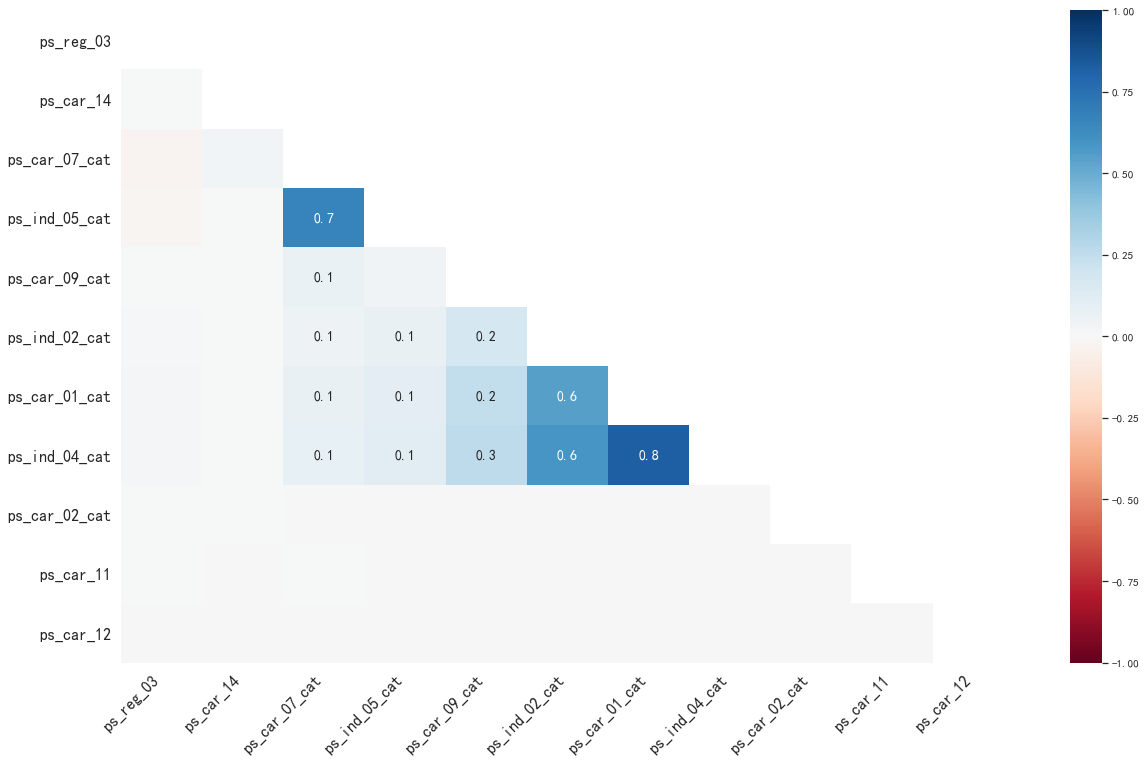

In [20]:
# Check the correlation of missing values between each pair of variables
msno.heatmap(fullset[cols_to_imp].replace(-1,np.nan))

As you can see by the above plot, for example.   
The absence of **ps_car_01_cat** leads to the absence of **ps_ind_04_cat**, a positive relationship and a large degree of correlation!

So, let's try to fill the associated variables with the multivariate imputation method!
- ps_ind_05_cat | ps_car_07_cat
- ps_car_01_cat | ps_ind_02_cat | ps_ind_04_cat
- ps_reg_03 | ps_car_14 （Continuous Type）

In [21]:
# Create lists based on correlations
set1 = ['ps_ind_05_cat','ps_car_07_cat']
set2 = ['ps_car_01_cat','ps_ind_02_cat','ps_ind_04_cat']
set3 = ['ps_reg_03','ps_car_14']

- Multivariate Imputation By Chained Equations (**MICE**)
    - The principle of the algorithm can be found in https://www.youtube.com/embed/WPiYOS3qK70

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, random_state=123)

In [23]:
%%time
imp_mean = IterativeImputer(estimator=rf, missing_values=-1, random_state=0)
# Impute missing values for set1 using the MICE algorithm
set1_imp = imp_mean.fit_transform(train[set1])

Wall time: 1.93 s


In [24]:
%%time
# Impute missing values for set2 using the MICE algorithm
set2_imp = imp_mean.fit_transform(train[set2])

Wall time: 8.51 s


In [25]:
%%time
# Impute missing values for set3 using the MICE algorithm
set3_imp = imp_mean.fit_transform(train[set3])

Wall time: 1min 38s


The above warnings indicate that the algorithm is not converging, so let's take a look at the distribution.

In [26]:
# View the result after imputation
pd.DataFrame(set3_imp,columns = set3)

ps_reg_03  ps_car_14
0        0.718070   0.370810
1        0.766078   0.388716
2        0.855884   0.347275
3        0.580948   0.294958
4        0.840759   0.365103
...           ...        ...
595207   0.692820   0.385487
595208   1.382027   0.378471
595209   0.659071   0.398748
595210   0.698212   0.384968
595211   0.776784   0.378021

[595212 rows x 2 columns]

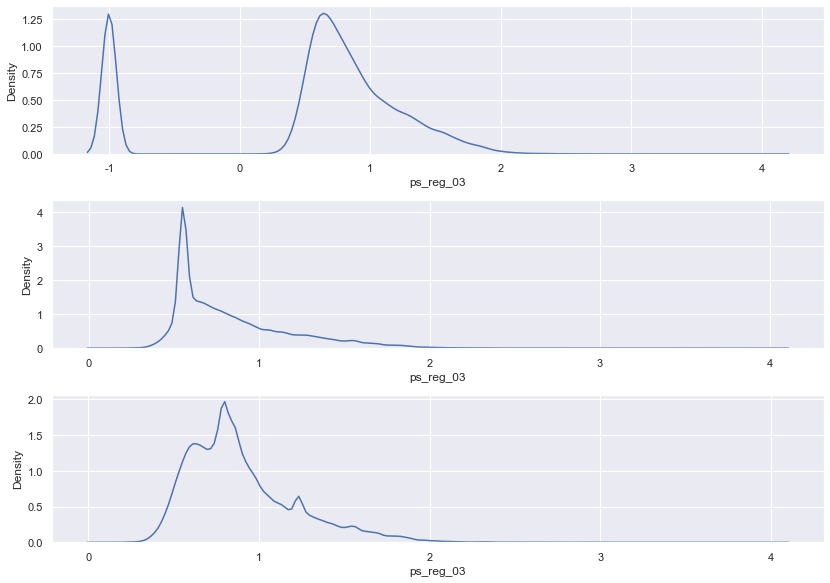

In [27]:
# View data distribution - ps_reg_03
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(3,1,1)
# Original data distribution
sns.kdeplot(train[set3[0]])
plt.subplot(3,1,2)
# Data distribution after using mean imputation
sns.kdeplot(train[set3[0]].replace(-1,np.nan).fillna(train[set3[0]].mean()))
plt.subplot(3,1,3)
# Data distribution after using MICE
sns.kdeplot(pd.DataFrame(set3_imp,columns = set3)[set3[0]])

plt.tight_layout()

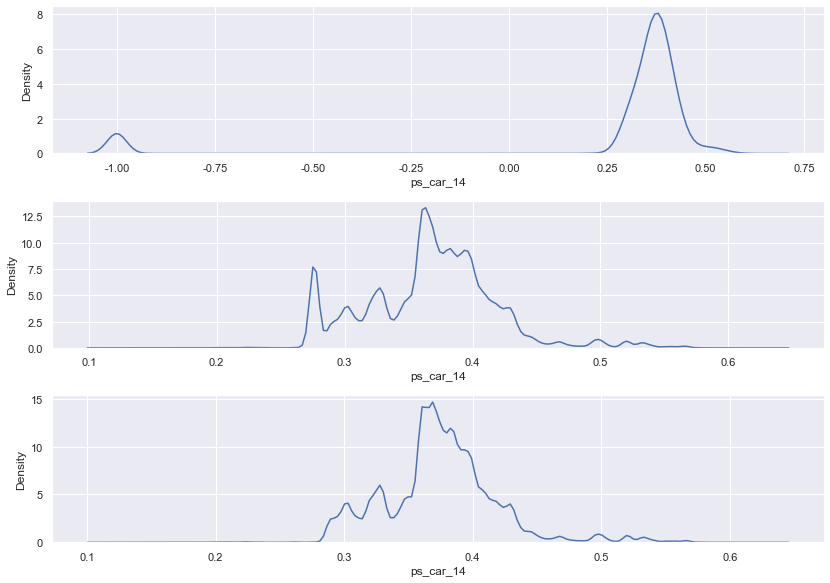

In [28]:
# View data distribution - ps_car_14
plt.subplot(3,1,1)
# Original data distribution
sns.kdeplot(train[set3[1]])
plt.subplot(3,1,2)
# Data distribution after using mean imputation
sns.kdeplot(train[set3[1]].replace(-1,np.nan).fillna(train[set3[1]].mean()))
plt.subplot(3,1,3)
# Data distribution after using MICE
sns.kdeplot(pd.DataFrame(set3_imp,columns = set3)[set3[1]])

plt.tight_layout()

It can be seen that MICE can better match the probability distribution of the original variables, so we choose to use MICE to impute!

In [29]:
# Use MICE to impute
train[set3] = pd.DataFrame(set3_imp,columns = set3)

#### 4.2 Univariate imputation

In [30]:
# Select the variables that need to be dropped
cols_to_drop = missing_data[missing_data['imputation']=='remove'].index.to_list()

In [31]:
# These are the variables that haven't been imputed yet, so we'll just impute them all with mode
missing_data[4:]

missing missing_percent            imputation
colname                                                     
ps_car_07_cat    28820    28820(1.94%)                  mode
ps_ind_05_cat    14519    14519(0.98%)                  mode
ps_car_09_cat     1446      1446(0.1%)                  mode
ps_ind_02_cat      523      523(0.04%)                  mode
ps_car_01_cat      267      267(0.02%)                  mode
ps_ind_04_cat      228      228(0.02%)                  mode
ps_car_02_cat       10        10(0.0%)                  mode
ps_car_11            6         6(0.0%)        (mode, median)
ps_car_12            1         1(0.0%)  (mode, median, mean)

Here we mainly use **SimpleImputer** to impute!

In [32]:
from sklearn.impute import SimpleImputer 

In [33]:
# Instantiation - strategy='most_frequent'
mode_imputer = SimpleImputer(missing_values = -1, strategy='most_frequent',add_indicator=True)
# Start imputation
imp = mode_imputer.fit_transform(train[missing_data[4:].index])
# Replace original data
train[missing_data[4:].index]=pd.DataFrame(imp).iloc[:,:len(missing_data[4:].index)]
# SimpleImputer will convert the original data type, which needs to be converted back
train[missing_data[4:-1].index] = train[missing_data[4:-1].index].astype('int64')
# drop columns
train.drop(cols_to_drop,axis=1,inplace=True)

In [34]:
# check out if we still have missing values
(train == -1).sum().sum()

0

In [35]:
# save data
train.to_csv('train_imp.csv')

Similarly, the same imputation is done for the test dataset.

In [36]:
test = pd.read_csv("test.csv")

In [37]:
set3 = ['ps_reg_03','ps_car_14']

In [38]:
%%time
# Impute missing values for set3 using the MICE algorithm
set3_imp_ = imp_mean.transform(test[set3])

Wall time: 2.12 s


In [39]:
# View the result after imputation
pd.DataFrame(set3_imp_,columns = set3)

ps_reg_03  ps_car_14
0        0.610328   0.352136
1        0.771362   0.358329
2        0.916174   0.398497
3        0.787055   0.381445
4        0.817771   0.385097
...           ...        ...
892811   1.048809   0.565685
892812   1.246495   0.418569
892813   0.609303   0.390384
892814   0.920937   0.378153
892815   0.992157   0.296648

[892816 rows x 2 columns]

In [40]:
# Use MICE to impute
test[set3] = pd.DataFrame(set3_imp_,columns = set3)

In [41]:
# View Results after imputation
test[set3]

ps_reg_03  ps_car_14
0        0.610328   0.352136
1        0.771362   0.358329
2        0.916174   0.398497
3        0.787055   0.381445
4        0.817771   0.385097
...           ...        ...
892811   1.048809   0.565685
892812   1.246495   0.418569
892813   0.609303   0.390384
892814   0.920937   0.378153
892815   0.992157   0.296648

[892816 rows x 2 columns]

In [42]:
# Start imputation - SimpleImputer 
imp_ = mode_imputer.transform(test[missing_data[4:].index])
# Replace original data
test[missing_data[4:].index]=pd.DataFrame(imp_).iloc[:,:len(missing_data[4:].index)]
# SimpleImputer will convert the original data type, which needs to be converted back
test[missing_data[4:-1].index] = test[missing_data[4:-1].index].astype('int64')
# drop columns
test.drop(cols_to_drop,axis=1,inplace=True)

In [43]:
# check out if we still have missing values
(test == -1).sum().sum()

0

In [44]:
# save data
test.to_csv('test_imp.csv')

---------------------------------------
## 5. EDA

In [45]:
# data visualization
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly import offline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)
# Used to display negative signs normally
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['font.sans-serif']=['SimHei']
# change text color
import colorama
from colorama import Fore, Style

In [46]:
# Read data
train_imp = pd.read_csv("train_imp.csv",index_col=0)
test_imp = pd.read_csv("test_imp.csv",index_col=0)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
fullset = pd.concat([train,test],ignore_index=True)

In [47]:
# call function to create metadata
metadata = meta(train,test)

### 5.1 Discrete feature analysis

We want to know the contribution of each discrete feature to target=1, which means the percentage of target=1 in each class for each discrete variable.

#### 5.1.1 Nominal

In [48]:
# Select nominal variables
cat_cols = metadata[(metadata.level == 'nominal') & (metadata.keep)].index

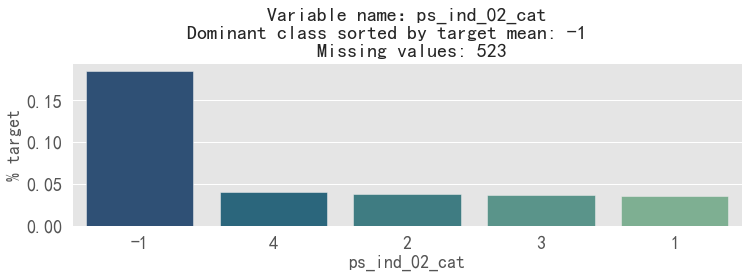

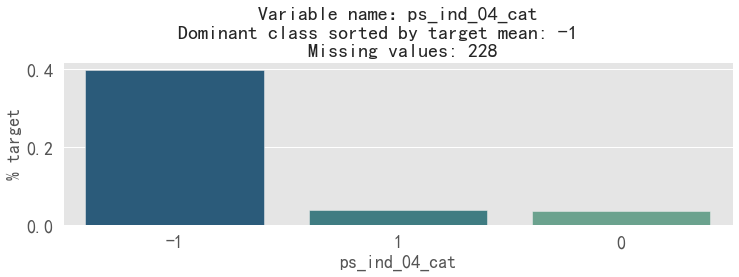

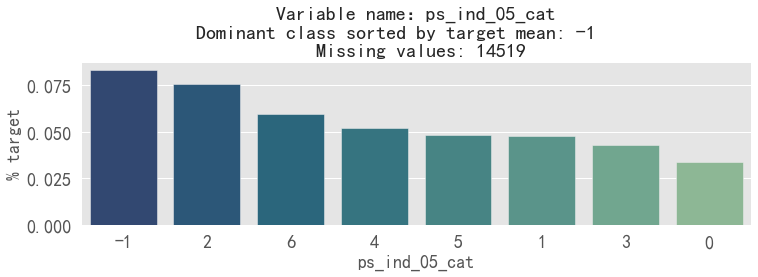

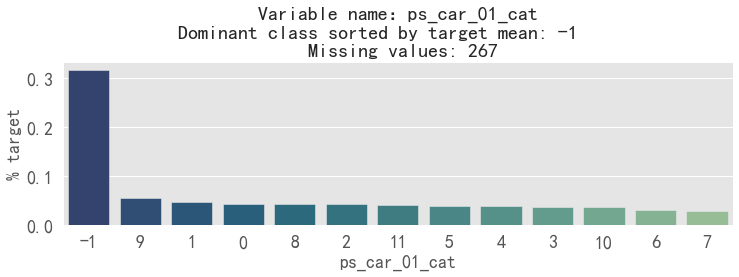

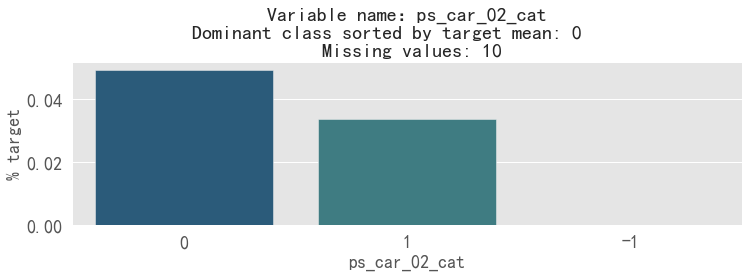

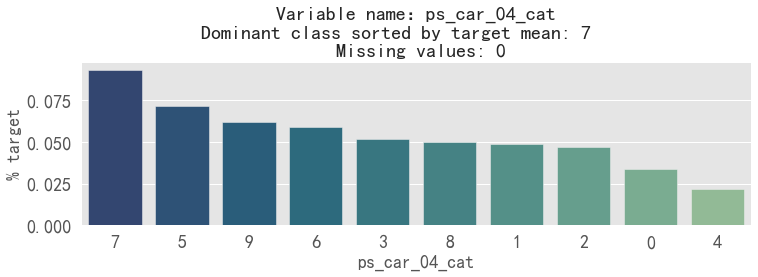

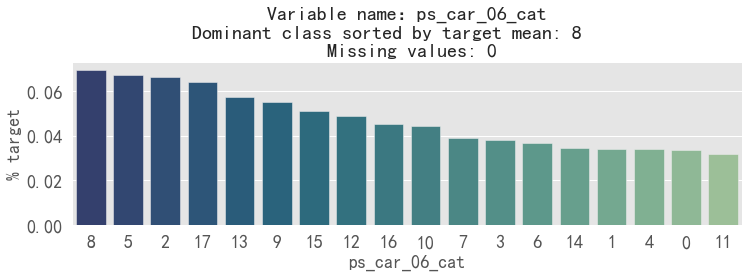

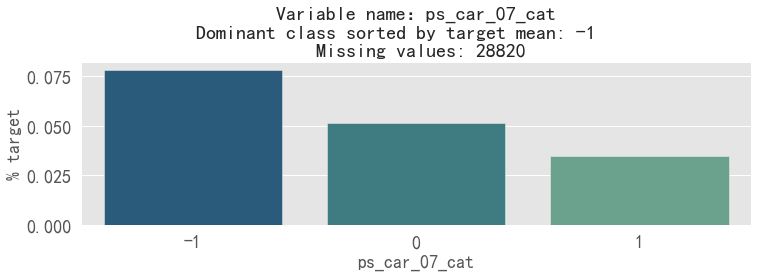

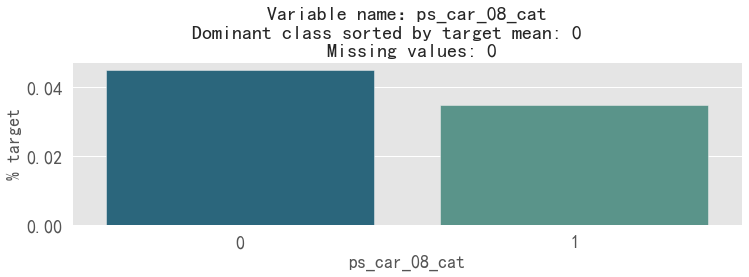

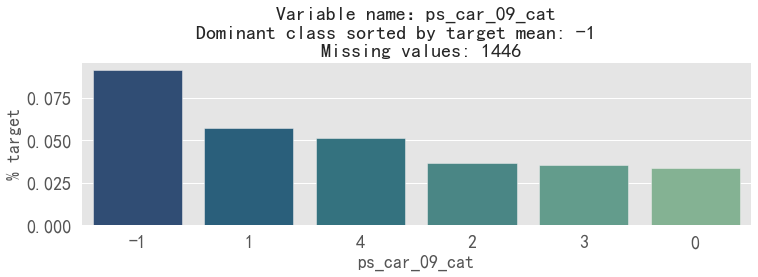

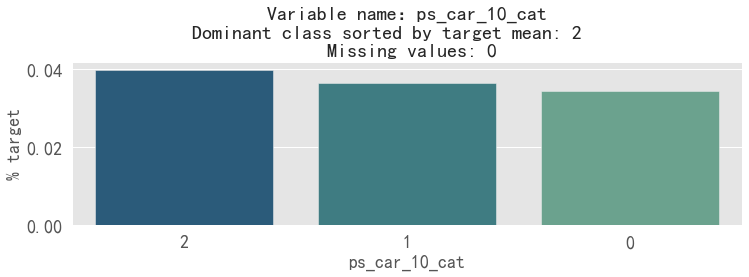

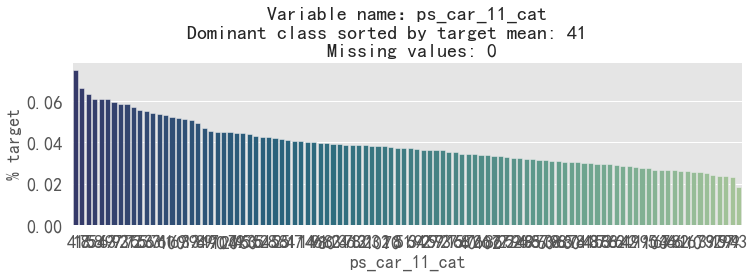

In [49]:
# Before data imputation
for col in cat_cols:
    fig, ax = plt.subplots(figsize=(12,3))
    # Calculate the percentage of target=1 in each class for each discrete variable
    cat_perc = train[[col, 'target']].groupby([col],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # The classes are listed in descending order according to the 'percentages'
    sns.barplot(ax=ax, x=col, y='target', data=cat_perc, order=cat_perc[col],palette='crest_r')
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(col, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.title(f"Variable name：{col}\n Dominant class sorted by target mean: {cat_perc[col].iloc[0]} \
    \n Missing values: {metadata.loc[col]['missing']}", fontsize = 20)
    plt.show();

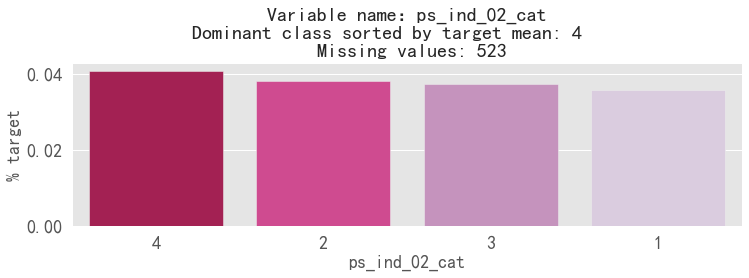

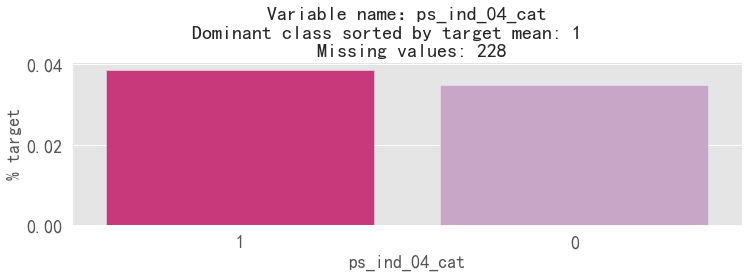

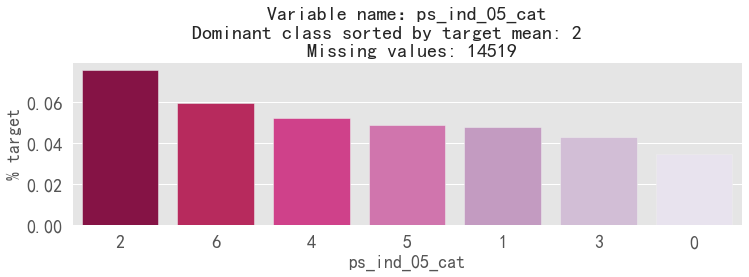

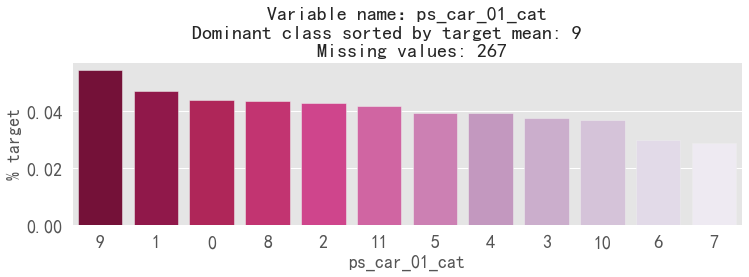

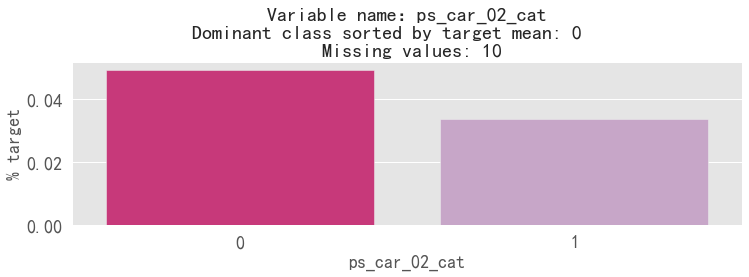

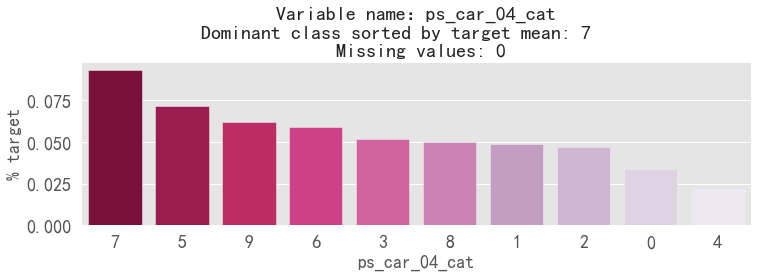

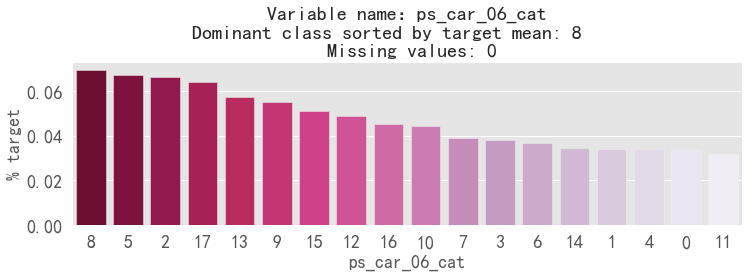

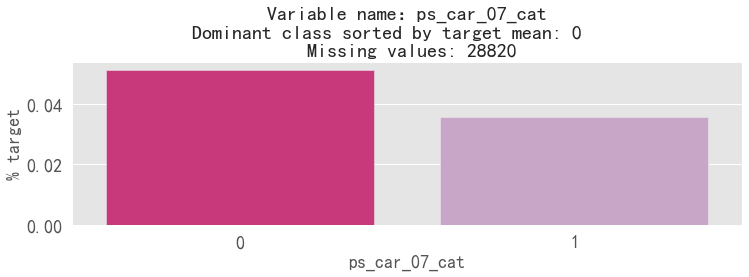

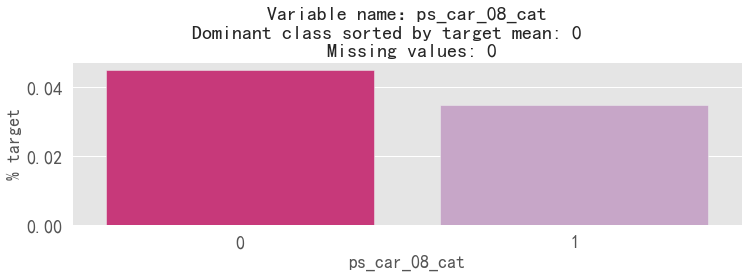

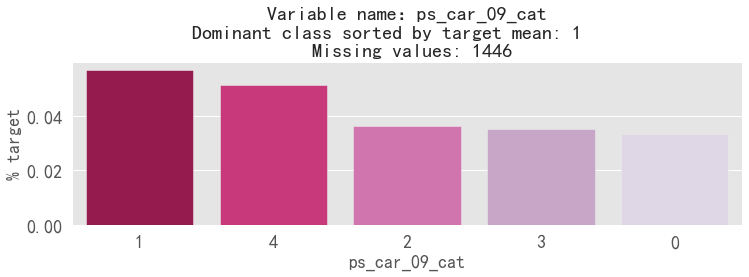

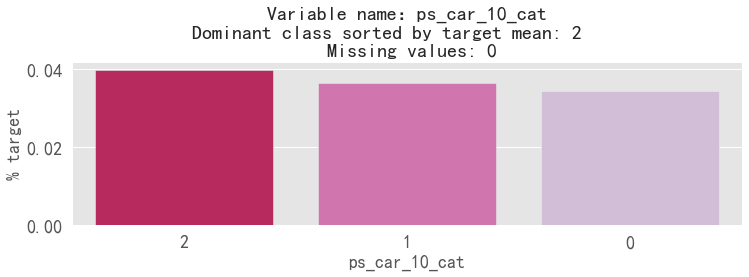

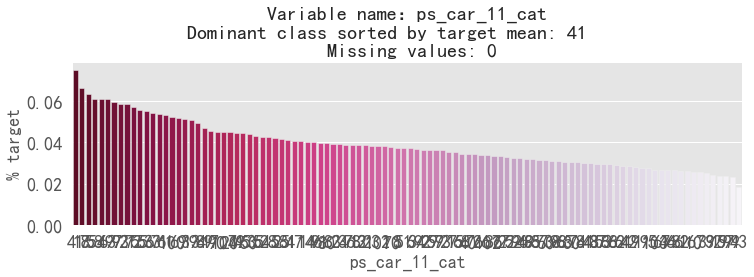

In [50]:
# After data imputation(no missing values)
for col in cat_cols:
    fig, ax = plt.subplots(figsize=(12,3))
    # Calculate the percentage of target=1 in each class for each discrete variable
    cat_perc = train_imp[[col, 'target']].groupby([col],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # The classes are listed in descending order according to the 'percentages'
    sns.barplot(ax=ax, x=col, y='target', data=cat_perc, order=cat_perc[col],palette='PuRd_r')
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(col, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.title(f"Variable name：{col}\n Dominant class sorted by target mean: {cat_perc[col].iloc[0]} \
    \n Missing values: {metadata.loc[col]['missing']}", fontsize = 20)
    plt.show();

1. Comparing the above two sets of plots, it can be found in the pre-populated plots that the variable ps_car_07_cat, for example, when its class is -1 (missing value), its corresponding target=1 has the highest percentage instead, and the other variables are in a similar situation, all exceeding 25%.

2. So we should keep the -1 (missing value) of the above variables as a class (the missing value is related to target=1)

In [51]:
# Select the columns we need to convert back
reverse_trans_cols = [
 'ps_car_07_cat',
 'ps_ind_05_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_car_01_cat',
 'ps_ind_04_cat',
]

In [52]:
# Convert to the original value (including the missing value -1)
train_imp[reverse_trans_cols] = train[reverse_trans_cols]
test_imp[reverse_trans_cols] = test[reverse_trans_cols]

#### 5.1.2 Binary

In [53]:
# Select binary variables
bin_cols = metadata[(metadata.level == 'binary') & (metadata.keep)].index

In [54]:
# Create two empty lists for 0 and 1 
zero_list = []
one_list = []
# Calculate the number of each binary variable 0 and 1 respectively
for col in bin_cols:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

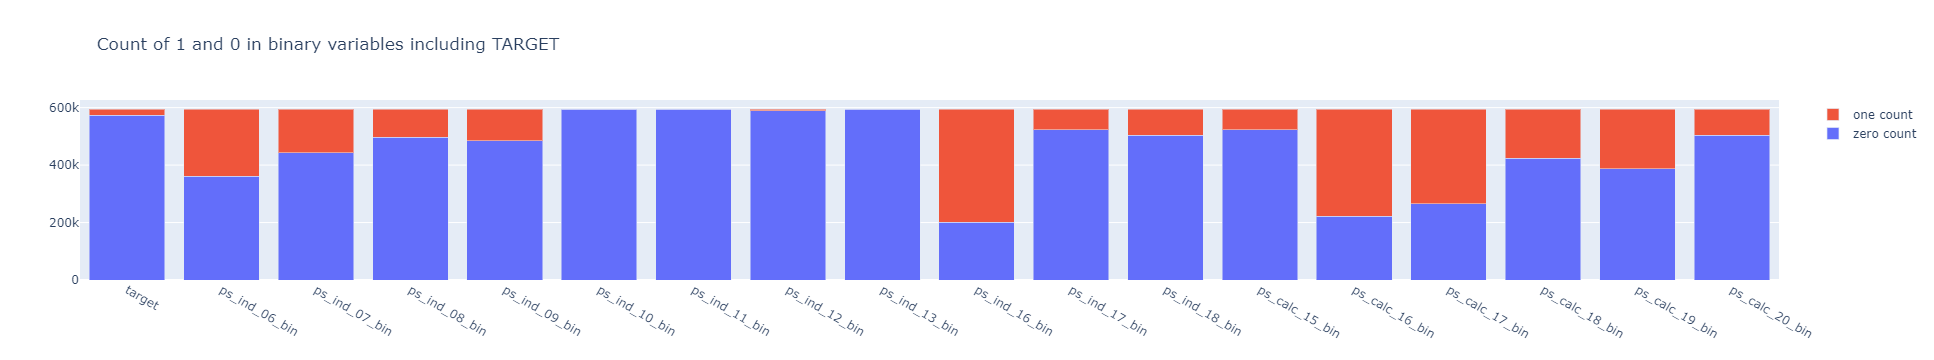

In [55]:
# Plor to show the number of zeros and ones respectively
trace1 = go.Bar(x = bin_cols,y = zero_list,name = 'zero count')
trace2 = go.Bar(x = bin_cols,y = one_list,name = 'one count')
data = [trace1, trace2]
layout = go.Layout(barmode='stack',title='Count of 1 and 0 in binary variables including TARGET')
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='stacked-bar')

![](https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/newplot.png?raw=true)

- Here we observe that there are 4 features : ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. 
- This begs the question of whether these features are useful at all as they do not contain much information about the other class vis-a-vis the target.

#### 5.1.3 Ordinal

In [56]:
# Select ordinal variables
ord_cols = metadata[(metadata.level == 'ordinal') & (metadata.keep)].index

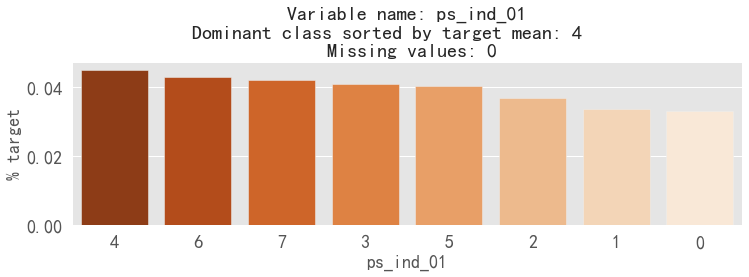

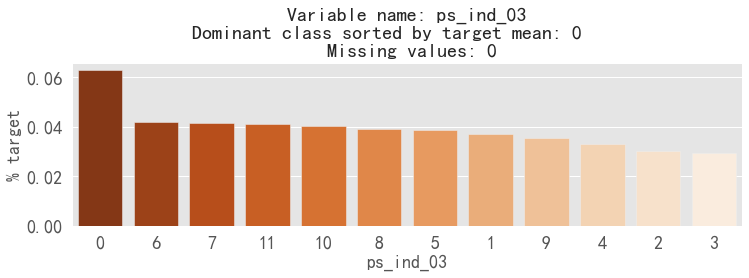

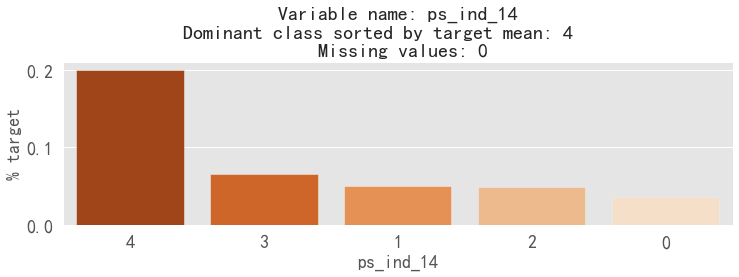

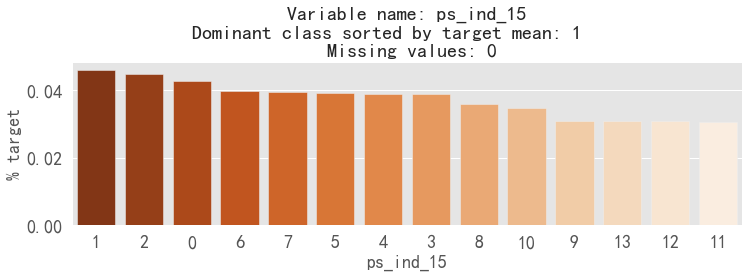

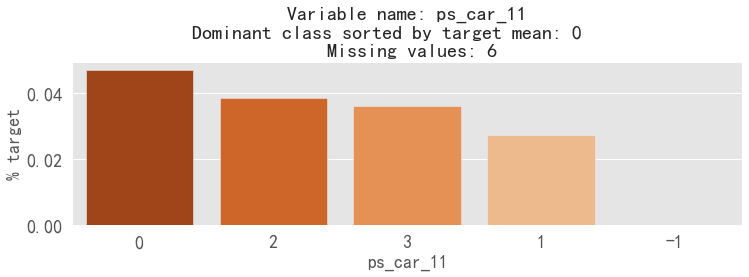

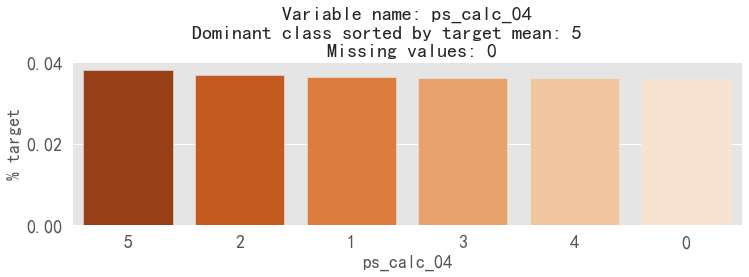

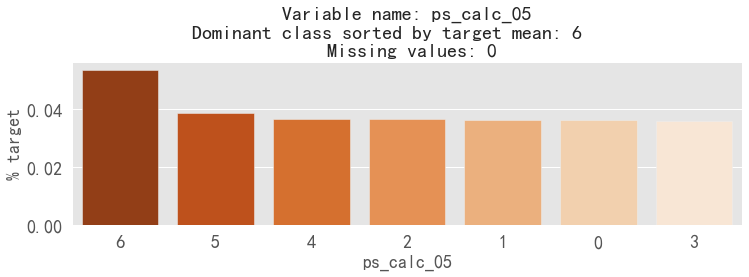

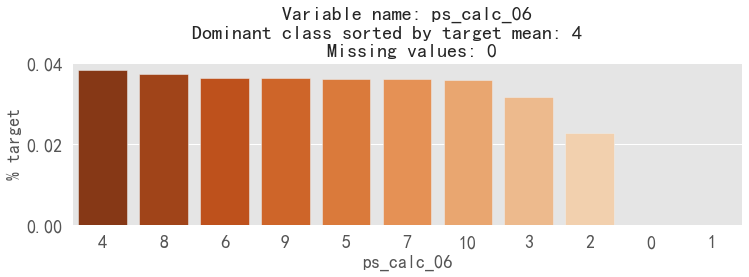

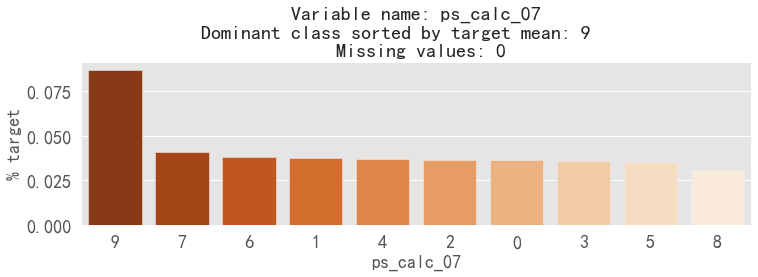

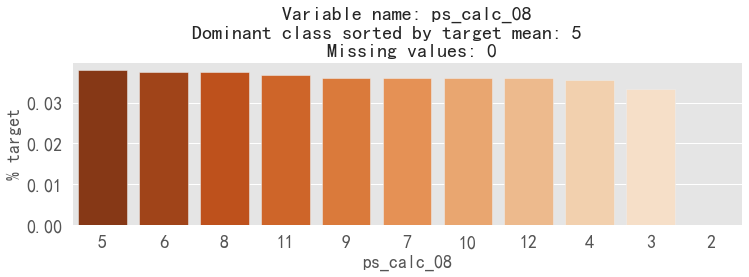

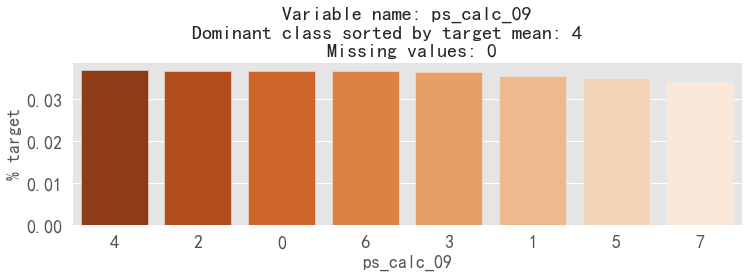

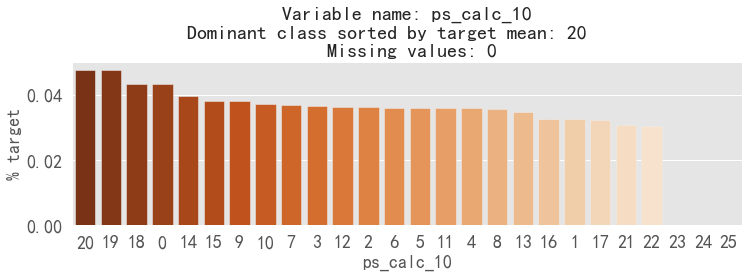

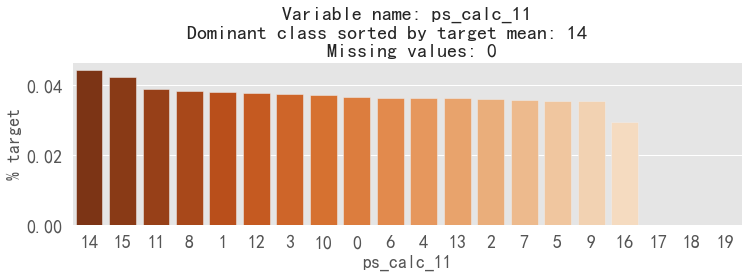

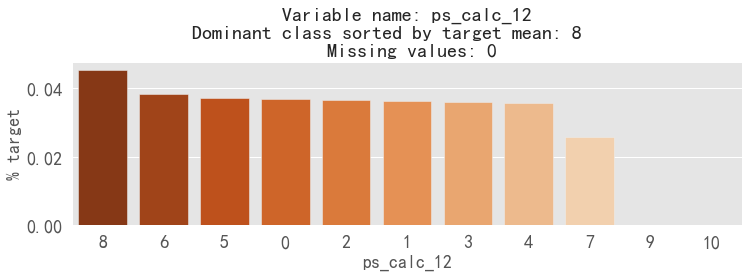

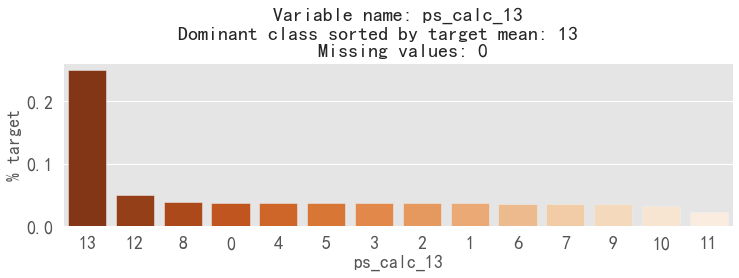

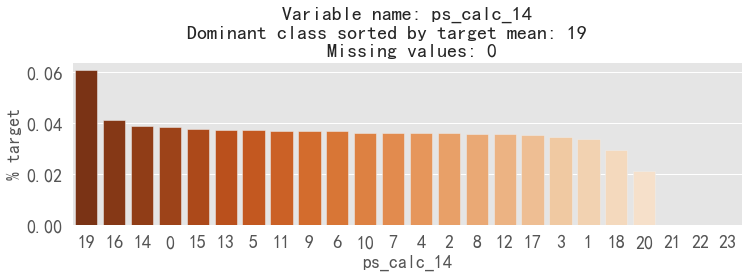

In [57]:
for col in ord_cols:
    fig, ax = plt.subplots(figsize=(12,3))
    # Calculate the percentage of target=1 in each class for each discrete variable
    cat_perc = train[[col, 'target']].groupby([col],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # The classes are listed in descending order according to the 'percentages'
    sns.barplot(ax=ax, x=col, y='target', data=cat_perc, order=cat_perc[col],palette='Oranges_r')
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(col, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.title(f"Variable name: {col}\n Dominant class sorted by target mean: {cat_perc[col].iloc[0]} \
    \n Missing values: {metadata.loc[col]['missing']}", fontsize = 20)
    plt.show();

### 5.2 Continuous feature analysis

#### 5.2.1 Correlation Analysis

In [58]:
# Select continuous variables
conti_cols = metadata[(metadata.level == 'interval')|(metadata.level == 'ratio') & (metadata.keep)].index
conti_cols

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object', name='colname')

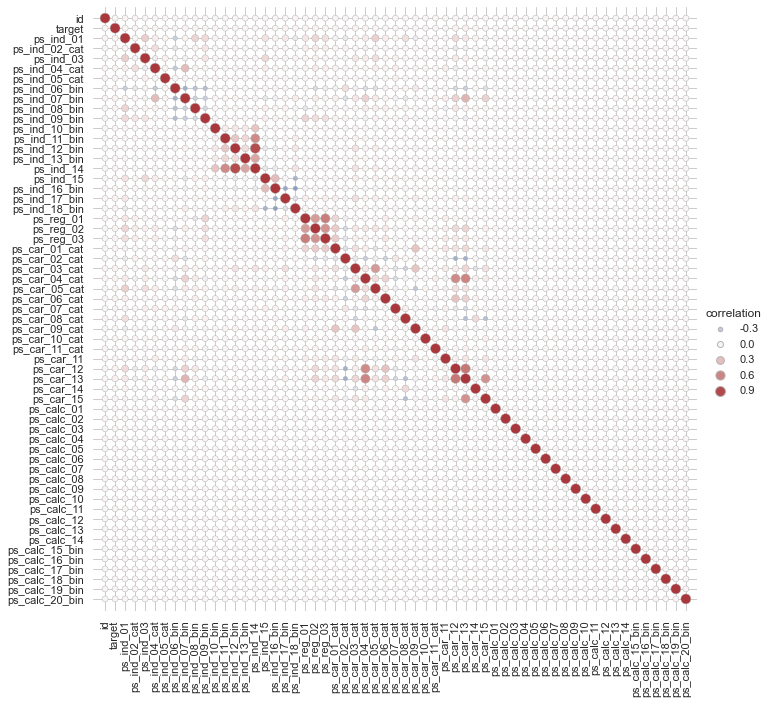

In [59]:
# Draw a correlation diagram
sns.set_theme(style="whitegrid")
corr_mat = train.corr().stack().reset_index(name='correlation')
# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(20, 100), size_norm=(-.2, .8))
# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

<AxesSubplot:>

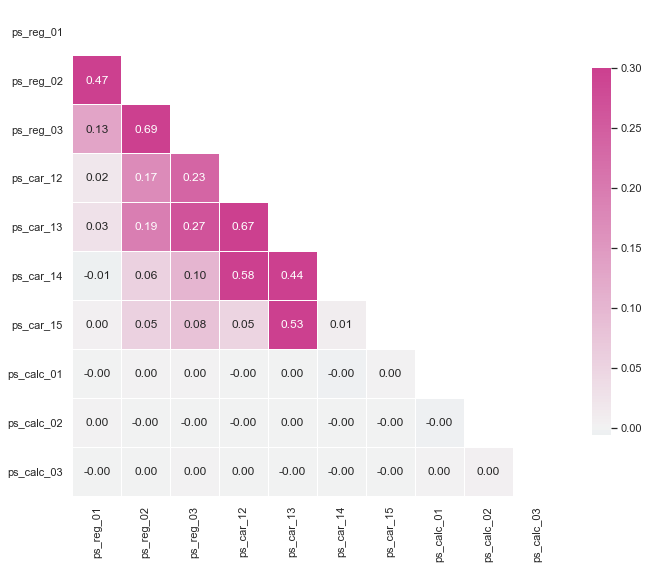

In [60]:
# Generate a mask for the upper triangle
corr_mat = train_imp[conti_cols].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, -20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75},annot=True,fmt='.2f')

There are a strong correlations between the variables:

- ps_reg_02 and ps_reg_03 (0.69)
- ps_car_12 and ps_car_13 (0.67)
- ps_car_12 and ps_car_14 (0.58)
- ps_car_13 and ps_car_15 (0.53)
- ps_reg_01 and ps_reg_02 (0.47)

#### 5.2.2 Regression analysis

In [61]:
# Randomly selected 2000 samples
trn_sample = train_imp.sample(2000)

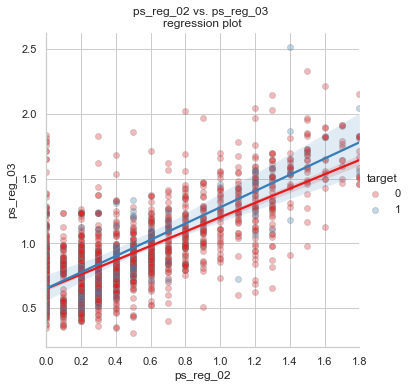

In [62]:
# ps_reg_02 vs. ps_reg_03
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=trn_sample, hue='target', 
           palette='Set1', height = 5, scatter_kws={'alpha':0.3,'edgecolor':'gray'}).set(title='ps_reg_02 vs. ps_reg_03 \nregression plot')

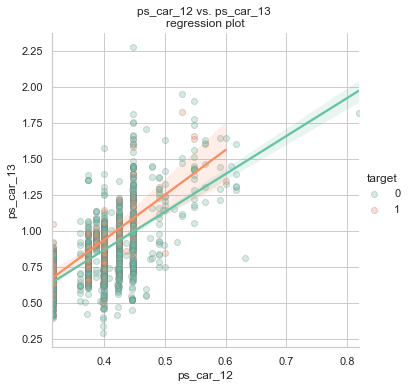

In [63]:
# ps_car_12 vs. ps_car_13
sns.lmplot(x='ps_car_12', y='ps_car_13', data=trn_sample, hue='target', 
           palette='Set2', height = 5, scatter_kws={'alpha':0.3,'edgecolor':'gray'}).set(title='ps_car_12 vs. ps_car_13 \nregression plot')

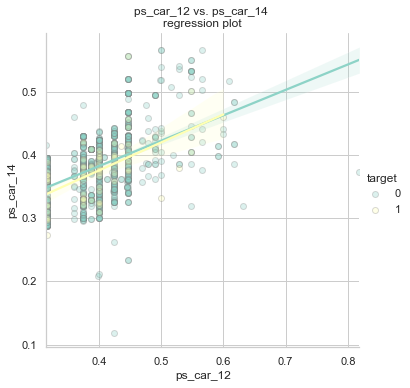

In [64]:
# ps_car_12 vs. ps_car_14
sns.lmplot(x='ps_car_12', y='ps_car_14', data=trn_sample, hue='target', 
           palette='Set3', height = 5, scatter_kws={'alpha':0.3,'edgecolor':'gray'}).set(title='ps_car_12 vs. ps_car_14 \nregression plot')

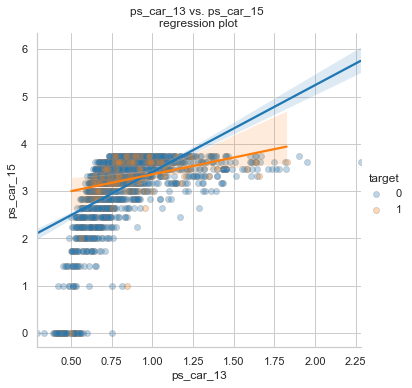

In [65]:
# ps_car_13 vs. ps_car_15
sns.lmplot(x='ps_car_13', y='ps_car_15', data=trn_sample, hue='target', 
           palette='tab10', height = 5, scatter_kws={'alpha':0.3,'edgecolor':'gray'}).set(title='ps_car_13 vs. ps_car_15 \nregression plot')

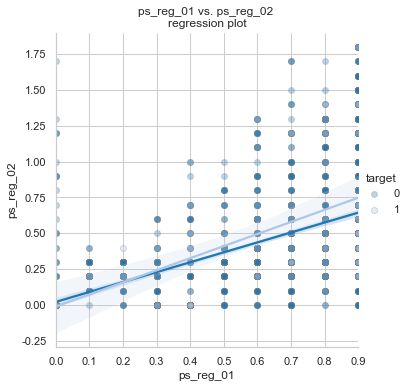

In [66]:
# ps_reg_01 vs. ps_reg_02
sns.lmplot(x='ps_reg_01', y='ps_reg_02', data=trn_sample, hue='target', 
           palette='tab20', height = 5, scatter_kws={'alpha':0.3,'edgecolor':'gray'}).set(title='ps_reg_01 vs. ps_reg_02 \nregression plot')

In [67]:
# save data
train_imp.to_csv('train_clean.csv')
test_imp.to_csv('test_clean.csv')

-----------------------------------------
## 6. Feature Engineering

In [68]:
# Read data 
train = pd.read_csv('train_clean.csv',index_col=0)
test = pd.read_csv('test_clean.csv',index_col=0)
fullset = pd.concat([train,test],ignore_index=True)

In [69]:
# call function to create metadata
metadata = meta(train,test)
metadata

role    category     level    dtype cardinality  \
colname                                                              
id                   id       other   nominal    int64      Ignore   
target           target       other    binary  float64      Ignore   
ps_ind_01       feature  individual   ordinal    int64           8   
ps_ind_02_cat   feature  individual   nominal    int64           4   
ps_ind_03       feature  individual   ordinal    int64          12   
ps_ind_04_cat   feature  individual   nominal    int64           2   
ps_ind_05_cat   feature  individual   nominal    int64           7   
ps_ind_06_bin   feature  individual    binary    int64           2   
ps_ind_07_bin   feature  individual    binary    int64           2   
ps_ind_08_bin   feature  individual    binary    int64           2   
ps_ind_09_bin   feature  individual    binary    int64           2   
ps_ind_10_bin   feature  individual    binary    int64           2   
ps_ind_11_bin   feature  individual    binary    int64           2   
ps_ind_12_bin   feature  individual    binary    int64           2   
ps_ind_13_bin   feature  individual    binary    int64           2   
ps_ind_14       feature  individual   ordinal    int64           5   
ps_ind_15       feature  individual   ordinal    int64          14   
ps_ind_16_bin   feature  individual    binary    int64           2   
ps_ind_17_bin   feature  individual    binary    int64           2   
ps_ind_18_bin   feature  individual    binary    int64           2   
ps_reg_01       feature      region     ratio  float64      Ignore   
ps_reg_02       feature      region  interval  float64      Ignore   
ps_reg_03       feature      region  interval  float64      Ignore   
ps_car_01_cat   feature         car   nominal    int64          12   
ps_car_02_cat   feature         car   nominal    int64           2   
ps_car_04_cat   feature         car   nominal    int64          10   
ps_car_06_cat   feature         car   nominal    int64          18   
ps_car_07_cat   feature         car   nominal    int64           2   
ps_car_08_cat   feature         car   nominal    int64           2   
ps_car_09_cat   feature         car   nominal    int64           5   
ps_car_10_cat   feature         car   nominal    int64           3   
ps_car_11_cat   feature         car   nominal    int64         104   
ps_car_11       feature         car   ordinal    int64           4   
ps_car_12       feature         car  interval  float64      Ignore   
ps_car_13       feature         car  interval  float64      Ignore   
ps_car_14       feature         car     ratio  float64      Ignore   
ps_car_15       feature         car  interval  float64      Ignore   
ps_calc_01      feature  calculated     ratio  float64      Ignore   
ps_calc_02      feature  calculated     ratio  float64      Ignore   
ps_calc_03      feature  calculated     ratio  float64      Ignore   
ps_calc_04      feature  calculated   ordinal    int64           6   
ps_calc_05      feature  calculated   ordinal    int64           7   
ps_calc_06      feature  calculated   ordinal    int64          11   
ps_calc_07      feature  calculated   ordinal    int64          10   
ps_calc_08      feature  calculated   ordinal    int64          12   
ps_calc_09      feature  calculated   ordinal    int64           8   
ps_calc_10      feature  calculated   ordinal    int64          26   
ps_calc_11      feature  calculated   ordinal    int64          21   
ps_calc_12      feature  calculated   ordinal    int64          12   
ps_calc_13      feature  calculated   ordinal    int64          16   
ps_calc_14      feature  calculated   ordinal    int64          25   
ps_calc_15_bin  feature  calculated    binary    int64           2   
ps_calc_16_bin  feature  calculated    binary    int64           2   
ps_calc_17_bin  feature  calculated    binary    int64           2   
ps_calc_18_bin  feature  calculated    binary    int64           2   
ps_calc_19_bin  feature  calc

### 6.1 Encoding

#### 6.1.1 OneHotEncoder
- Encode categorical features as a one-hot numeric array.

In [70]:
# Select nominal variables
nominal_cols = metadata[(metadata.level == 'nominal') & (metadata.keep == True)].index.tolist()
nominal_cols

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [71]:
from sklearn.preprocessing import OneHotEncoder
# Instantiation
enc = OneHotEncoder(handle_unknown = "ignore",sparse=False)
# Encoding in progress......
trn_nominal_cols_enc = enc.fit_transform(train[nominal_cols])
tst_nominal_cols_enc = enc.transform(test[nominal_cols])

This expands the data dimension, but adds no additional information and the features are very sparse. So we don't use this.

#### 6.1.2 targetEncoder
- Replace the category with the mean value of the target corresponding to this category

In [72]:
# Write a function that adds noise to help reduce data leakage
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))
# Write targetEncoder function
def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1,  # Defines a threshold (number of categories compared to the feature)
                  smoothing=1,
                  noise_level=0):

    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Scatter the group mean of this column about the target
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Smooth
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Calculate the mean of all targets
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    # Calculate the mean for train...
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # ... and test 
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_tst_series.index = tst_series.index
    # call add_noise funtion
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

- **min_samples_leaf** defines a threshold (compared to the number of categories of the feature), when **averages["count"]** (the number of categories of the feature) and min_samples_leaf are equal, the **priority** (the mean of all targets) and **average** (the target of a given category of mean) have the same weight (smoothing=0.5).    
- When the number of the category is lower than the threshold (smoothing<0.5), the prize weight is greater, and when it is higher than the threshold (smoothing>0.5), the average weight is greater.
- For the smoothed mean of each category of target, the random noise is then added by the add_noise method (defining the noise_level parameter and combining it with random values) to finally reduce data leakage

In [73]:
# Call targetEncoder function
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [74]:
# Add a new column to store the encoded data
train["ps_car_11_cat_tar_enc"] = train_encoded.astype('float64')
test['ps_car_11_cat_tar_enc'] = test_encoded.astype('float64')

In [75]:
# Select the columns to be removed
cols_to_drop = metadata[metadata['imputation'] == 'remove'].index.tolist()
cols_to_drop.append('ps_car_11_cat')

In [76]:
# update train_clean and test_clean
train_clean = train.drop(cols_to_drop,axis=1)
test_clean = test.drop(cols_to_drop,axis=1)

In [77]:
# save data
train_clean.to_csv('train_clean_1.csv')
test_clean.to_csv('test_clean_1.csv')

In [78]:
# Merge data sets
fullset = pd.concat([train_clean,test_clean],ignore_index=True)

### 6.2 Feature Transformation

#### 6.2.1 WOE and IV

- **WOE**（Weight of Evidence）- describes the relationship between features and targets, and is commonly used for feature transformations;
- 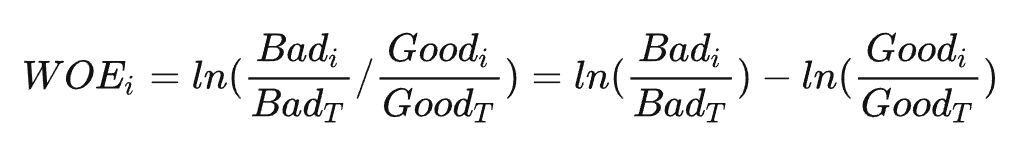
- **IV**（Information Value）- It is used to measure the predictive power of features and can be used to quickly filter variables. 


In [79]:
# Write woe_iv function
def woe_iv_encoding(data, feat, target, max_intervals, verbose = True):
    # binning
    feat_bins = pd.qcut(x = data[feat], q = max_intervals, duplicates='drop')
    gi = pd.crosstab(feat_bins,data[target])
    gb = pd.Series(data=data[target]).value_counts()
    bad = gi[1]/gi[0]
    good = gb[1]/gb[0]
    # Calculate woe（each bin） gb[1]->bad_total gb[0]->good_total
    woe = np.log(bad)- np.log(good)
    # Calculate iv（each bin）
    iv = woe * (bad-good)
    # Calculate iv for the whole feature (sum of iv for each bin)
    f_iv = iv.sum()
    if verbose == True:
        print(f"According to the current number of intervals{max_intervals}，feature{feat}, the total information value calculated is：{f_iv}")
        print('='*80)
    # Perform mapping operations
    dic = iv.to_dict()
    # Discretization of continuous variables
    iv_bins = feat_bins.map(dic) 
    return iv_bins.astype('float64')

In [80]:
continuous_cols = metadata[(metadata.level == 'interval')|(metadata.level == 'ratio') & (metadata.keep == True)].index.tolist()
for col in continuous_cols:
    fullset[f"{col}_woe"] = woe_iv_encoding(data = fullset, feat = col, target = 'target', max_intervals = 20)
    #sns.displot(fullset_copy[f"{col}_woe"])

According to the current number of intervals20，featureps_reg_01, the total information value calculated is：0.007409796017170396
According to the current number of intervals20，featureps_reg_02, the total information value calculated is：0.02079753534877242
According to the current number of intervals20，featureps_reg_03, the total information value calculated is：0.025236756687202
According to the current number of intervals20，featureps_car_12, the total information value calculated is：0.024511246988077877
According to the current number of intervals20，featureps_car_13, the total information value calculated is：0.05727993046042877
According to the current number of intervals20，featureps_car_14, the total information value calculated is：0.018607761843529805
According to the current number of intervals20，featureps_car_15, the total information value calculated is：0.014987287598760824
According to the current number of intervals20，featureps_calc_01, the total information value calculated is：0

![](https://miro.medium.com/max/1156/1*5S_5aAHWe0_knDGZUK3W8w.png)

### 6.3 Feature Enhancement

#### 6.3.1 Feature Interaction
- Interaction combinations generate new features

In [81]:
from sklearn.preprocessing import PolynomialFeatures
# Instantiation
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# Start feature interaction
interactions = pd.DataFrame(data=poly.fit_transform(fullset[continuous_cols]), 
                            columns=poly.get_feature_names_out(continuous_cols))
# Remove the original columns
interactions.drop(continuous_cols, axis=1, inplace=True)  
# Concat the interaction variables to the train data
print('Before feature interaction, the training set has {} variables '.format(fullset.shape[1]))
fullset = pd.concat([fullset, interactions], axis=1)
print('After feature interaction, the training set has {} variables'.format(fullset.shape[1]))

Before feature interaction, the training set has 67 variables 
After feature interaction, the training set has 112 variables


### 6.4 Feature Selection

#### 6.4.1 Based on statistical metrics

In [82]:
from sklearn.feature_selection import VarianceThreshold
# Instantiation
selector = VarianceThreshold(threshold=.01)
# Fit to train without id and target variables
selector.fit(fullset.drop(['id', 'target'], axis=1)) 
# Function to toggle boolean array elements
f = np.vectorize(lambda x : not x)
v = fullset.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))

19 variables have too low variance.


#### 6.4.2 Based on model metrics

<Figure size 7200x1440 with 0 Axes>

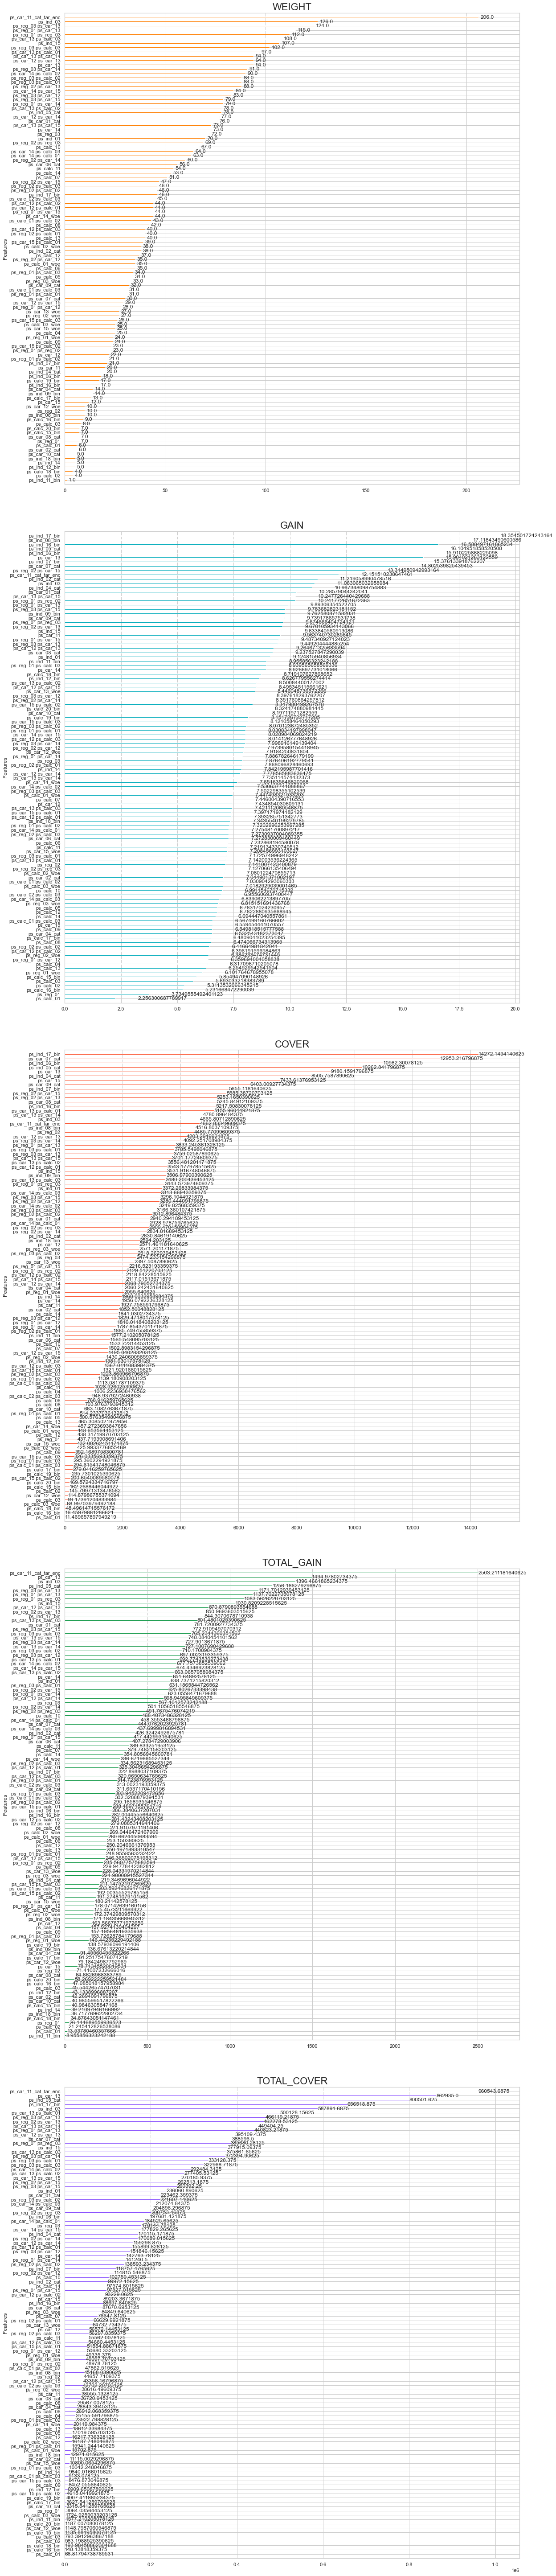

In [83]:
from xgboost import XGBClassifier
from xgboost import plot_importance

plt.figure(figsize = [100,20])
X = fullset.loc[train.index].drop(['id', 'target'], axis=1)
y = fullset.loc[train.index].target
# Instantiation
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
# define subplot grid
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 80))
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
# loop through tickers and axes
colors = ['#ff7f01','#08aebd','#fc5531','#139948','#8950fe']
for ty, ax, color in zip(types, axs.ravel(), colors):
    # filter df for ticker and plot on specified axes
    plot_importance(ax = ax, booster = model,importance_type=ty, color = color)
    # chart formatting
    ax.set_title(ty.upper(),fontsize = 22)
    ax.set_xlabel("")
plt.show()

In [84]:
# The strategy of feature engineering is used as the key, ...
# ... and the list of corresponding variable names is used as the value.
from sklearn.feature_selection import SelectFromModel
feat_dict = {}
# Three Strategies
for thres in ['median','mean','1.25*mean']:
    model_select = SelectFromModel(model, threshold=thres, prefit=True)
    print(f'Total number of features before selection:{X.shape[1]}')
    n_features = model_select.transform(X.values).shape[1]
    print(f'Total number of features after selection: {n_features}【{thres}】')
    print('-'*50)
    selected_vars = list(X.columns[model_select.get_support()])
    feat_dict[thres] = selected_vars
# Iterating over importance types
for ty in types:
    feat_dict[ty] = list(model.get_booster().get_score(importance_type=ty).keys())

Total number of features before selection:110
Total number of features after selection: 55【median】
--------------------------------------------------
Total number of features before selection:110
Total number of features after selection: 40【mean】
--------------------------------------------------
Total number of features before selection:110
Total number of features after selection: 13【1.25*mean】
--------------------------------------------------


In [85]:
# Update data and save
final_train = fullset.loc[train.index][feat_dict['mean']+['target']]
final_test = fullset.loc[test.index][feat_dict['mean']]
final_train.to_csv("final_train.csv")
final_test.to_csv("final_test.csv")

------------------------------
## 7.Data Modeling

In [86]:
# Read data
final_train = pd.read_csv('final_train.csv',index_col=0)
final_test = pd.read_csv('final_test.csv',index_col=0)

In [87]:
# Split data to X and y
X = final_train.drop('target',axis=1)
y = final_train.target

### 7.1 Model Evaluation Metrics

- For unbalanced data, we cannot use traditional accuracy to measure the goodness of the model
- and this project uses the normalized Gini coefficient as an evaluation metric.
- the normalized Gini coefficient ranges from ***0 to 1***(The highest score on kaggle is ***0.286***)

In [88]:
# Refer to the function provided by this competition on Kaggle
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

- This metric is used for imbalanced data, where the prediction of a very large magnitude of data in a dichotomous problem leads to dilution of the prediction of a very small magnitude of data, and the general metric(accuracy) can be misleading.
- The confusion matrix can measure the prediction accuracy and coverage of the two types of data through precision and recall and f-score respectively, but it cannot be synthesized into one indicator to reflect whether the prediction of the two types of data together is good or bad.
- **auc-roc can reflect this result**, and it is interconvertible with normalized gini coefficent: **Gini = 2 * auc-roc -1**

### 7.2 Build Models

#### 7.2.1 Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Instantiation
dt = DecisionTreeClassifier(random_state = 1001)

In [90]:
# Random Search - tuning hyperparameters
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'criterion':('gini','entropy')
    ,'max_depth':[*range(1,10)]
    ,'min_samples_leaf':[*range(1,50,5)]
}
# Instantiation
RS = RandomizedSearchCV(dt,parameters,n_iter=20,scoring='roc_auc')
# fit
%time RS = RS.fit(X,y)

Wall time: 6min 31s


In [91]:
print('\n Best normalized gini score:' )
print(RS.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(RS.best_params_)


 Best normalized gini score:
0.21365334596689656

 Best hyperparameters:
{'min_samples_leaf': 21, 'max_depth': 6, 'criterion': 'gini'}


#### 7.2.2 Logistic regression

In [92]:
from sklearn.linear_model import LogisticRegression
# Instantiation
lr = LogisticRegression(random_state = 1001)

In [93]:
# Random Search - tuning hyperparameters
from sklearn.model_selection import RandomizedSearchCV
parameters = {
#       'solver':['liblinear'],
      'C':np.linspace(1,200),
      'penalty':["l1","l2"]
}
# Instantiation
RS = RandomizedSearchCV(lr,parameters,n_iter=50,scoring='roc_auc')
# fit
%time RS = RS.fit(X,y)

Wall time: 5min 56s


In [94]:
print('\n Best normalized gini score:' )
print(RS.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(RS.best_params_)


 Best normalized gini score:
0.24104381075256387

 Best hyperparameters:
{'penalty': 'l2', 'C': 159.38775510204084}


#### 7.2.3 XGBoost

In [95]:
from xgboost import XGBClassifier
# Instantiation
xgb = XGBClassifier(learning_rate=0.06, n_estimators=300, objective='binary:logistic',nthread=4)

In [96]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
folds = 3
param_comb = 5
# Apply StratifiedKFold
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
# Instantiation
RS = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )
# fit
%time RS.fit(X, y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Wall time: 5min 28s


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000018731ECEAC0>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interacti...
                                           monotone_constraints=None,
                                           n_estimators=300, n_jobs=None,
                                           nthread=4, num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5, 10],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [97]:
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(RS.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(RS.best_params_)


 Best normalized gini score for 3-fold search with 5 parameter combinations:
0.27813567586694643

 Best hyperparameters:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 4, 'gamma': 5, 'colsample_bytree': 0.6}


- Based on the roc_auc(normalized gini) score for the three models, We choose **XGBoost** for the next optimization iteration

In [98]:
# Choose the best combination of parameters after tuning
MAX_ROUNDS = 400
OPTIMIZE_ROUNDS = False
LEARNING_RATE = 0.07
EARLY_STOPPING_ROUNDS = 50  
# Instantiation
model = XGBClassifier(  n_estimators=MAX_ROUNDS, max_depth=4, objective="binary:logistic", learning_rate=LEARNING_RATE, subsample=1.0,
                      min_child_weight=5, colsample_bytree=.6, scale_pos_weight=1.6, gamma=5, reg_alpha=8, reg_lambda=1.3)

In [99]:
from sklearn.model_selection import KFold
# Implement K fold Cross-Validation
K = 10
kf = KFold(n_splits = K, random_state = 1, shuffle = True)
np.random.seed(1996)

In [100]:
# Write gini_score funtion
def gini_score(preds, dtrain):
    labels = dtrain.get_label()
    # call eval_gini function
    gini_score = -eval_gini(labels, preds)
    return [('gini', gini_score)]

In [101]:
def XGB_gini(df_train,tar_enc = True,pca = False):
    '''
    df_train: Processed training set data
    tar_enc: Whether to use target encoding for category variables
    pca: Whether to use pca
    ''' 
    # Split data to X and y
    y = df_train.target
    X = df_train.drop('target',axis=1)
    y_valid_pred = 0*y
    y_test_pred = 0
    
    # Call(import) target_encode funtion(.py file)
    from target_encoding import target_encode
    train = pd.concat([X,y],axis=1)
    # k-fold cross-validation
    for i, (train_index, test_index) in enumerate(kf.split(train)):
        # Divided into training set, validation set, and test set
        y_train, y_valid = y.iloc[train_index].copy(), y.iloc[test_index]
        X_train, X_valid = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()        
        X_test = final_test.copy()

        print( f"\n{i} fold cross-validation： ")
        
        if pca == False:
            # If tar_enc is true, target encoding is performed on all cat variables
            if tar_enc == True:
                f_cat = [f for f in X.columns if '_cat' in f and 'tar_enc' not in  f]
                for f in f_cat:
                    X_train[f + "_avg"], X_valid[f + "_avg"], X_test[f + "_avg"] = target_encode(trn_series=X_train[f],val_series=X_valid[f],tst_series=X_test[f],
                                                                    target=y_train,min_samples_leaf=100,smoothing=10,noise_level=0)
            X_train.drop(f_cat,axis=1,inplace=True)
            X_valid.drop(f_cat,axis=1,inplace=True)
            X_test.drop(f_cat,axis=1,inplace=True)

        # For the current fold, run XGBoost
        if OPTIMIZE_ROUNDS:
            eval_set=[(X_valid,y_valid)]
            # fit
            fit_model = model.fit( X_train, y_train, 
                                   eval_set=eval_set,
                                  # call gini_score funtion
                                   eval_metric=gini_score,
                                   early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                                   verbose=False
                                 )
            print( "  Best N trees = ", model.best_ntree_limit )
            print( "  Best gini = ", model.best_score )
        else:
            # fit
            fit_model = model.fit( X_train, y_train )

        # Generate prediction results for the validation set
        pred = fit_model.predict_proba(X_valid)[:,1]
        print( "  normalized gini coefficent = ", eval_gini(y_valid, pred) )
        y_valid_pred.iloc[test_index] = pred

        # Cumulative calculation of test set prediction results
        y_test_pred += fit_model.predict_proba(X_test)[:,1]

        del X_test, X_train, X_valid, y_train

    y_test_pred /= K  # Take the mean value of each fold result

    print( "\n Normalized gini coefficent for the entire training set ( combined ):" )
    print( "  final normalized gini score = ", eval_gini(y, y_valid_pred) )
    
    return y_test_pred,eval_gini(y, y_valid_pred)

In [102]:
%%time
# get final normalized gini score
y_test_pred, gini_score = XGB_gini(df_train=final_train,tar_enc=True)


0 fold cross-validation： 
  normalized gini coefficent =  0.27339424835682324

1 fold cross-validation： 
  normalized gini coefficent =  0.29250806944001007

2 fold cross-validation： 
  normalized gini coefficent =  0.29464644971427956

3 fold cross-validation： 
  normalized gini coefficent =  0.26721846386784365

4 fold cross-validation： 
  normalized gini coefficent =  0.2622998017629542

5 fold cross-validation： 
  normalized gini coefficent =  0.284343713065919

6 fold cross-validation： 
  normalized gini coefficent =  0.29343790418319826

7 fold cross-validation： 
  normalized gini coefficent =  0.2972934087626107

8 fold cross-validation： 
  normalized gini coefficent =  0.2901729545130186

9 fold cross-validation： 
  normalized gini coefficent =  0.26887255999855875

 Normalized gini coefficent for the entire training set ( combined ):
  final normalized gini score =  0.2822374207618298
Wall time: 7min 29s
